In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
import json
from matplotlib.pyplot import figure
import matplotlib

In [2]:
#Read the file
df=pd.read_csv("U.S._State_and_Territorial_Stay-At-Home_Orders__March_15__2020___May_31__2021_by_County_by_Day.csv")
#df = pd.read_csv("U.S._State_and_Territorial_Stay-At-Home_Orders__March_15__2020___May_31__2021_by_County_by_Day.csv", nrows=10000)

In [3]:
#Drop empty raws
df.dropna(axis=0, inplace=True)

In [4]:
#Filter the data for only a specific state and quarter
#df=df[(df["State_Tribe_Territory"]=="California") & (df["Quarter"]==1)]

#Dropping the columns that are not needed
df.drop(columns=['FIPS_Code', 'Citations', 'SAH_Order_Code','County_Name'], inplace=True)

In [5]:
df.count()

State_Tribe_Territory    2357659
Date                     2357659
Stay_at_Home_Order       2357659
dtype: int64

In [6]:
#Converting the date column to a datetime format
df["Date"]=pd.to_datetime(df["Date"])

In [7]:
#Calculate the quarter for each date
df["Quarter"]=df["Date"].dt.quarter

In [8]:
#Renaming columns
df.rename(columns={'State_Tribe_Territory':'State', 'County_Name':'County', 'Date':'Date', 'Quarter':'Quarter', 'Stay_at_Home_Order':'Stay_at_Home_Order'}, inplace=True)
#Setting State as index
df.set_index('State', inplace=False)

# Sort the DataFrame by the Date column in ascending order
df.sort_values(by='Date', ascending=True, inplace=True)

df

,State,Date,Stay_at_Home_Order,Quarter
1544887,Puerto Rico,2020-03-15,Mandatory for all individuals,1
2355858,Puerto Rico,2020-03-15,Mandatory for all individuals,1
1701858,Puerto Rico,2020-03-15,Mandatory for all individuals,1
1793254,Puerto Rico,2020-03-15,Mandatory for all individuals,1
2212340,Puerto Rico,2020-03-15,Mandatory for all individuals,1
...,...,...,...,...
116087,Iowa,2022-08-09,No order to stay at home,3
37961,Georgia,2022-08-09,No order to stay at home,3
116084,Idaho,2022-08-09,No order to stay at home,3
37966,Iowa,2022-08-09,No order to stay at home,3


In [9]:
dates = pd.date_range(start='2020-03-15', end='2022-05-31', freq='M')
quarters = dates.to_period("Q")

df

,State,Date,Stay_at_Home_Order,Quarter
1544887,Puerto Rico,2020-03-15,Mandatory for all individuals,1
2355858,Puerto Rico,2020-03-15,Mandatory for all individuals,1
1701858,Puerto Rico,2020-03-15,Mandatory for all individuals,1
1793254,Puerto Rico,2020-03-15,Mandatory for all individuals,1
2212340,Puerto Rico,2020-03-15,Mandatory for all individuals,1
...,...,...,...,...
116087,Iowa,2022-08-09,No order to stay at home,3
37961,Georgia,2022-08-09,No order to stay at home,3
116084,Idaho,2022-08-09,No order to stay at home,3
37966,Iowa,2022-08-09,No order to stay at home,3


In [10]:
#df['Period']=df['Date'].astype(str) + df['Quarter'].astype(str)
df['Quarter'] = df['Date'].dt.quarter
df['Quarter'] = df['Quarter'].apply(lambda x: 'Q' + str(x))

df['Period'] = df['Date'].dt.strftime('%Y') + "-" + df['Quarter']

df.drop(columns=['Quarter'], inplace=True)
df

,State,Date,Stay_at_Home_Order,Period
1544887,Puerto Rico,2020-03-15,Mandatory for all individuals,2020-Q1
2355858,Puerto Rico,2020-03-15,Mandatory for all individuals,2020-Q1
1701858,Puerto Rico,2020-03-15,Mandatory for all individuals,2020-Q1
1793254,Puerto Rico,2020-03-15,Mandatory for all individuals,2020-Q1
2212340,Puerto Rico,2020-03-15,Mandatory for all individuals,2020-Q1
...,...,...,...,...
116087,Iowa,2022-08-09,No order to stay at home,2022-Q3
37961,Georgia,2022-08-09,No order to stay at home,2022-Q3
116084,Idaho,2022-08-09,No order to stay at home,2022-Q3
37966,Iowa,2022-08-09,No order to stay at home,2022-Q3


In [11]:
#df = df.groupby(['State','Date','Period'], as_index=False).agg({'Stay_at_Home_Order': 'sum'})
#df

In [12]:
# Group the data by "State" and "Period" columns
grouped_df = df.groupby(["State", "Period"])

# Aggregate the "Stay_at_Home_Order" column using the `agg` function
result_df = grouped_df["Stay_at_Home_Order"].agg(lambda x: " ".join(x))

# Reset the index of the result DataFrame
result_df = result_df.reset_index()
result_df

,State,Period,Stay_at_Home_Order
0,Alabama,2020-Q2,Mandatory for all individuals Mandatory for al...
1,Alabama,2020-Q3,Advisory Advisory Advisory Advisory Advisory A...
2,Alabama,2020-Q4,Advisory Advisory Advisory Advisory Advisory A...
3,Alabama,2021-Q1,Advisory Advisory Advisory Advisory Advisory A...
4,Alabama,2021-Q2,Advisory Advisory Advisory Advisory Advisory A...
...,...,...,...
502,Wisconsin,2020-Q1,Mandatory for all individuals Mandatory for al...
503,Wisconsin,2020-Q2,Mandatory for all individuals Mandatory for al...
504,Wisconsin,2020-Q3,No order to stay at home No order to stay at h...
505,Wisconsin,2020-Q4,No order to stay at home No order to stay at h...


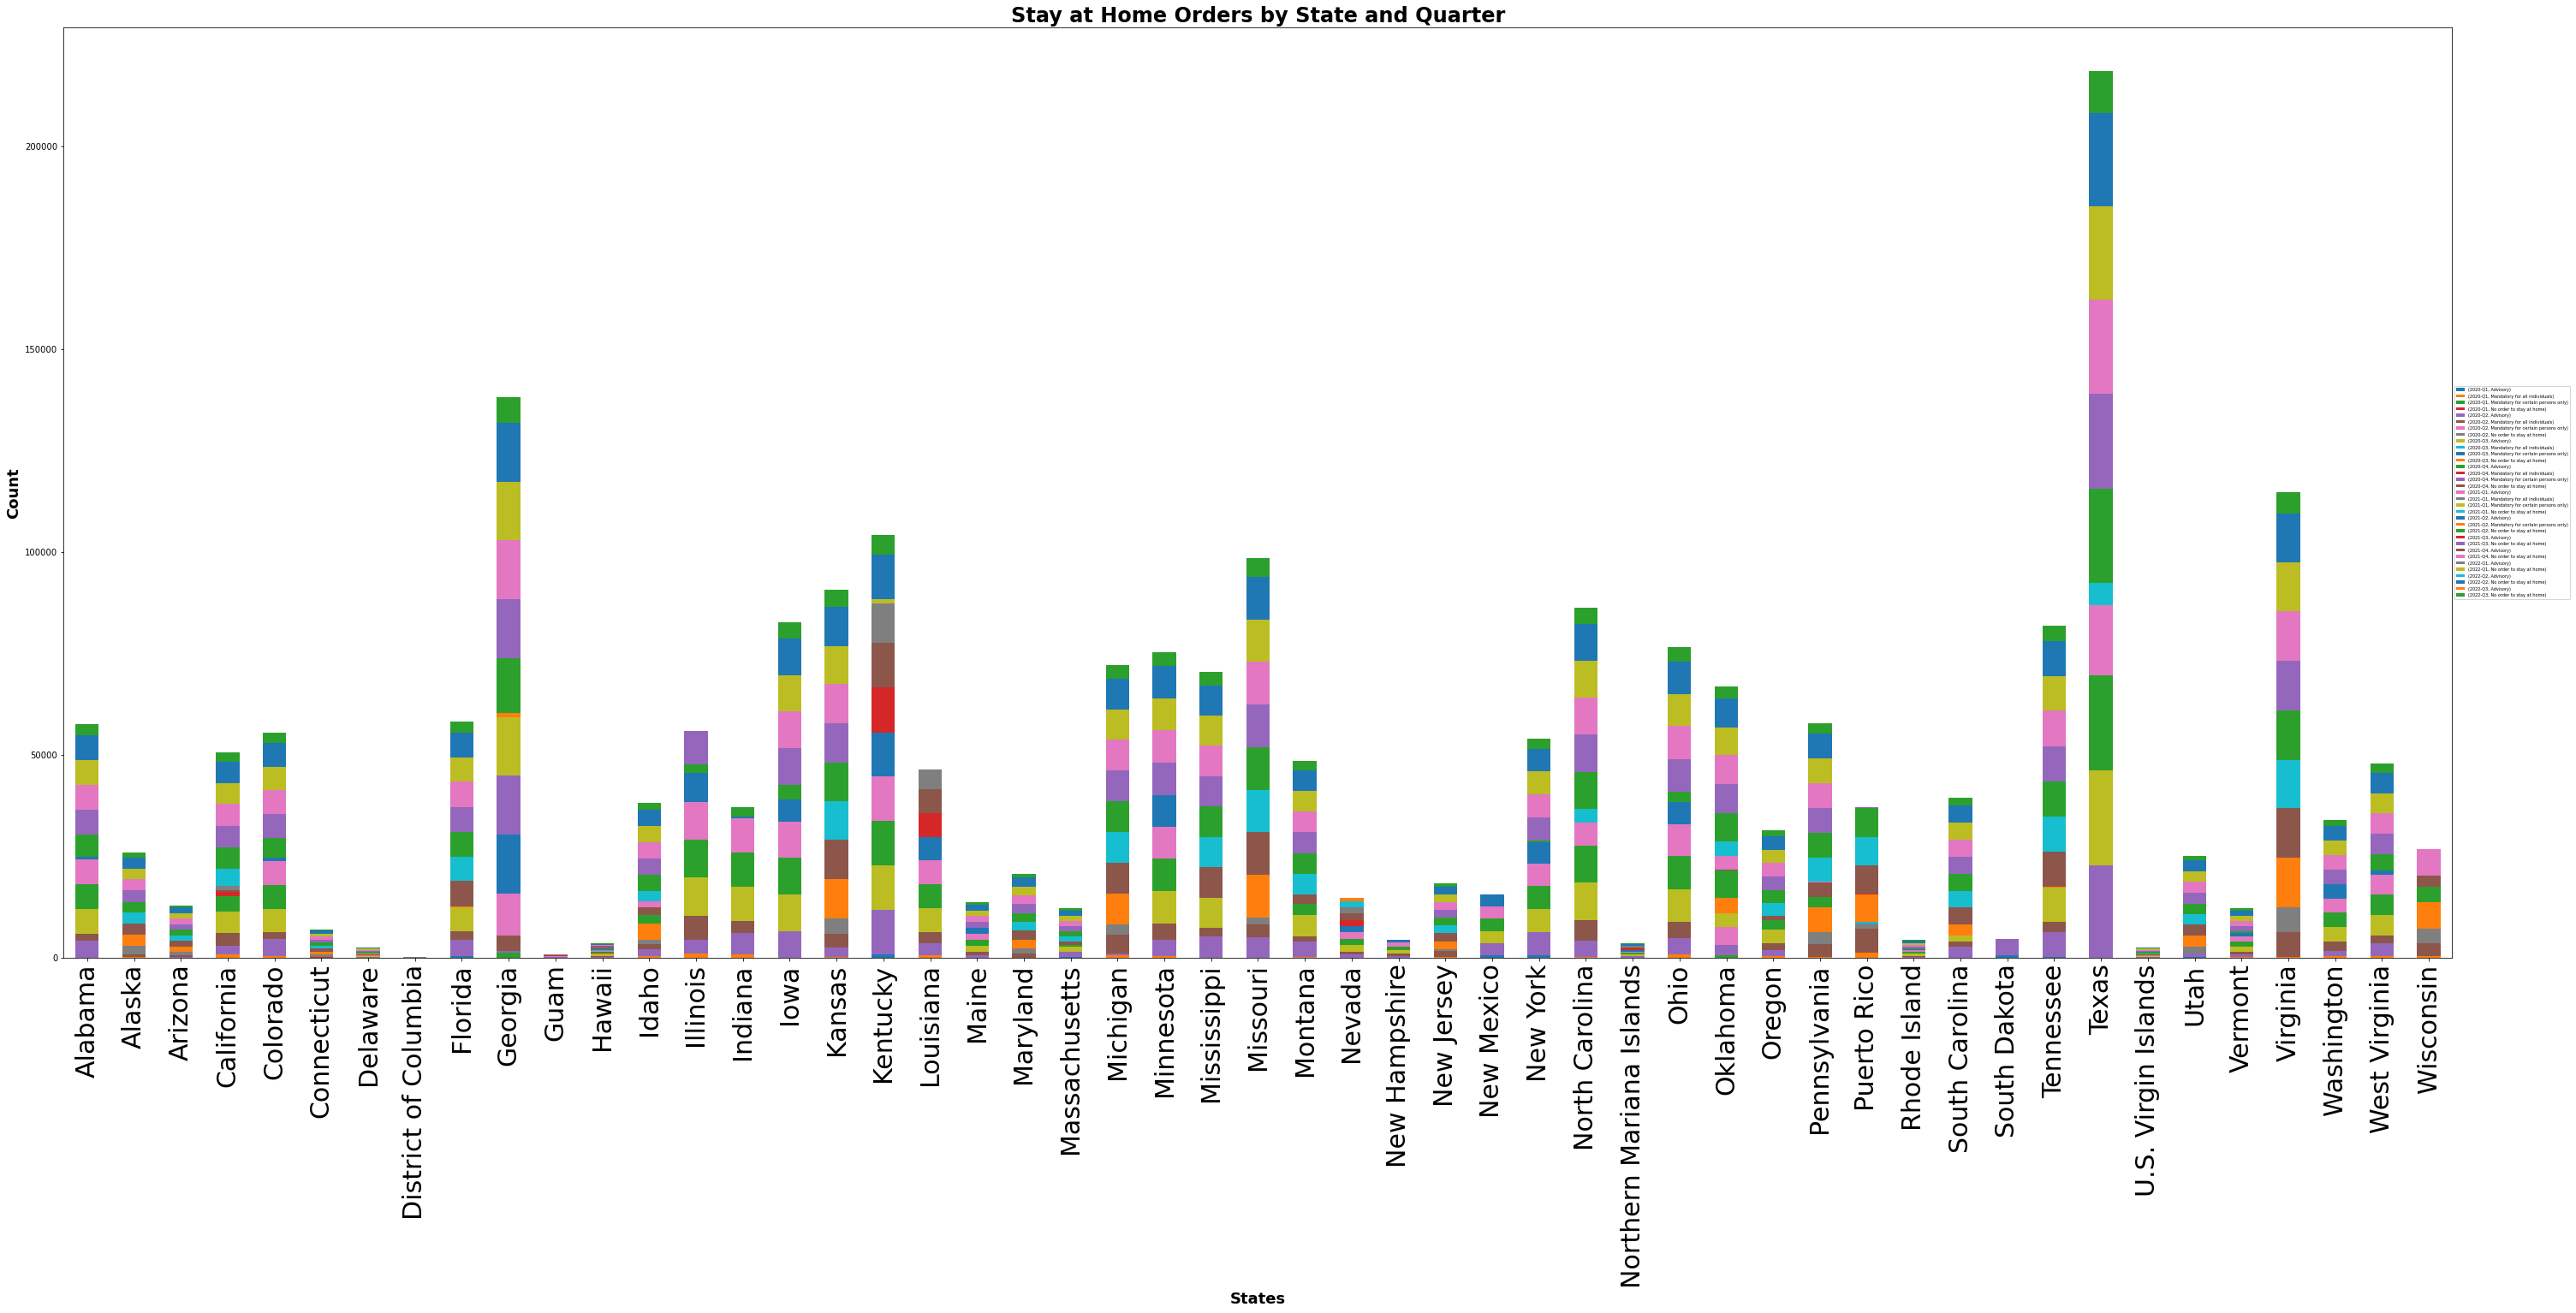

In [13]:
# Create a new DataFrame with the count of each category of stay-at-home order per state and quarter
df_categories = pd.DataFrame(df.groupby(["State", "Period", "Stay_at_Home_Order"]).size(), columns=["Count"])
df_categories = df_categories.reset_index()

# Create a pivot table to reshape the data into the desired format
df_categories_pivot = df_categories.pivot_table(index="State", columns=["Period", "Stay_at_Home_Order"], values="Count")

# Plot the stacked bar plot
df_categories_pivot.plot(kind="bar", figsize=(50,20), stacked=True)

# Add the x-axis label and y-axis label
plt.xlabel("States", fontsize=18, weight='bold')
plt.ylabel("Count", fontsize=18, weight='bold')

# Add the title
plt.title("Stay at Home Orders by State and Quarter", fontsize=24, weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=5)
plt.xticks(fontsize=30)
# Show the plot
plt.show()

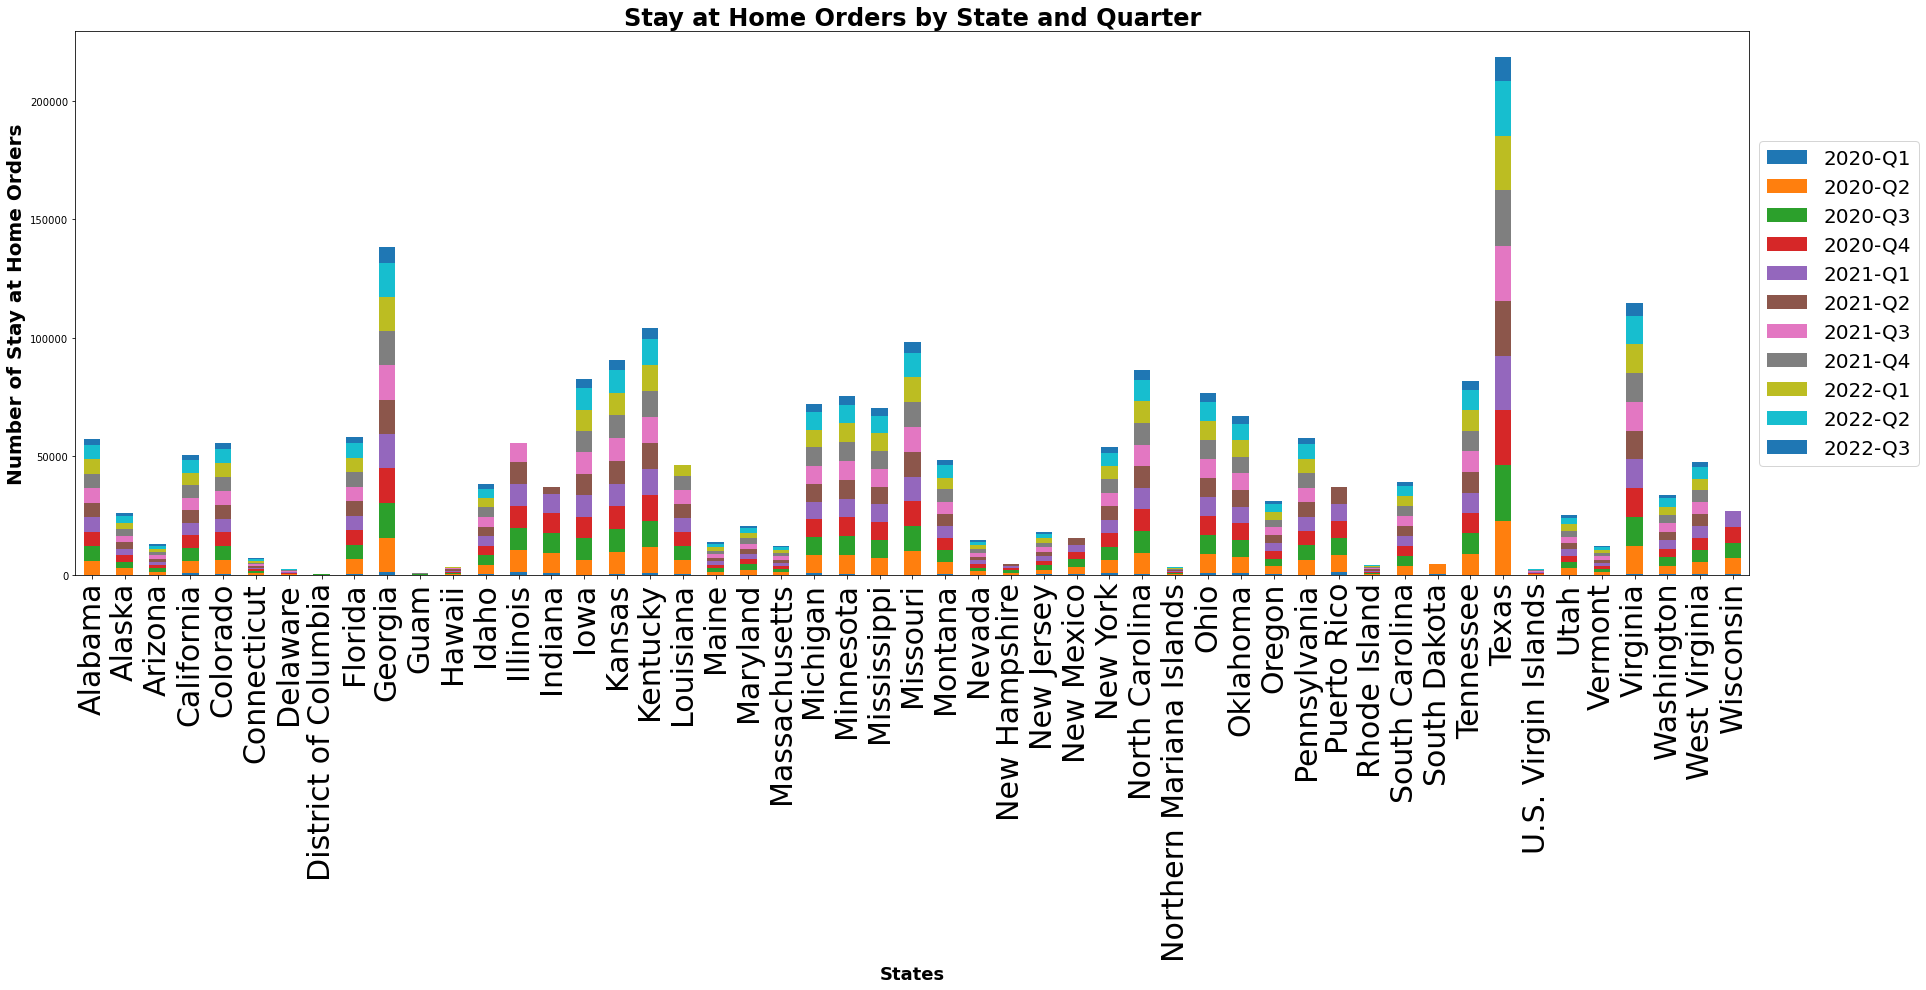

In [14]:
# Group the data by state and quarter and count the number of orders
grouped = df.groupby(["State", "Period"]).count()["Stay_at_Home_Order"]

# Reset the index and pivot the data to create the bar chart
grouped = grouped.reset_index().pivot(index="State", columns="Period", values="Stay_at_Home_Order")

# Plot the bar chart
grouped.plot(kind="bar", figsize=(30,10) , stacked=True)
plt.xlabel("States", fontsize=18, weight='bold')
plt.ylabel("Number of Stay at Home Orders", fontsize=20, weight='bold')
plt.title("Stay at Home Orders by State and Quarter", fontsize=24, weight='bold')
plt.xticks(fontsize=30)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=20)

plt.show()

In [15]:
# Reset the index to make the quarter and state columns into separate columns
#stay_at_home_orders = stay_at_home_orders.reset_index()

#Plot the total number of stay-at-home orders by quarter
#plt.plot(stay_at_home_orders['Stay_at_Home_Order'], stay_at_home_orders['State','Period'], '-o')

 #Add labels to the x and y axes
#plt.xlabel('Total Stay_at_Home_Order')
#plt.ylabel('State','Period')

# Show the plot
#plt.show()

In [42]:
#state_orders = df.groupby(['State'], as_index=False)['Stay_at_Home_Order'].sum()
# Find all the stay-at-home orders
#stay_at_home_orders = df[df['Stay_at_Home_Order'] == "Yes"]

# Print the stay-at-home orders dataframe
#print(stay_at_home_orders)

In [17]:
#Stay_at_Home_Order  = ['Advisory','No order to stay at home', 'Mandatory for all individuals']

#def print_Stay_at_Home_Order (Stay_at_Home_Order ):
    #for Stay_at_Home_Order  in Stay_at_Home_Order :
         #print(Stay_at_Home_Order )
        

#Stay_at_home_order = df.groupby(['State'], as_index=True)['Stay_at_Home_Order'].sum()

# Plot the total number of stay-at-home orders by state
#plt.plot(Stay_at_Home_Order['State'], Stay_at_Home_Order['Stay_at_Home_Order'],'-o')

# Add labels to the x and y axes
#plt.xlabel('State')
#plt.ylabel('Total Stay_at_Home_Order')

# Show the plot
#plt.show()

In [17]:
#Stay_at_Home_Order = Stay_at_Home_Order.groupby(['Stay_at_Home_Order'], as_index=False)['Period'].sum()

#df.plot(x='Period', y='Stay_at_Home_Order', kind='bar', figsize=(20, 20))

# Add a title and labels to the x and y axes
#plt.title('Stay-at-Home Orders by State')
#plt.xlabel('Total Stay_at_Home_Order ')
#plt.ylabel('Period')

# Show the plot
#plt.show()

In [18]:
#data=pd.DataFrame(df, columns=["State","Period","Stay_at_Home_Order"])

#data.plot(x="Period", y=["State","Date","Stay_at_Home_Order"], kind="bar",figsize=(20,15), stacked = True)
#plt.show()

In [20]:
# Reset the index to make the quarter and state columns into separate columns
#stay_at_Home_Orders = stay_at_Home_Orders.reset_index()

# Plot the total number of stay-at-home orders by quarter
#plt.plot(stay_at_home_orders['State'], stay_at_home_orders['Stay_at_Home_Order'],'-o') #quarter

# Add labels to the x and y axes
##plt.xlabel('State')
#plt.ylabel('Total Stay_at_Home_Order') #Quarter

# Show the plot
#plt.show()